In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

In [2]:
iris = datasets.load_iris()

In [7]:
cols = iris.feature_names
data = iris.data

In [9]:
data.shape

(150, 4)

#### to implement a simple gaussian mixture model, we are taking first features

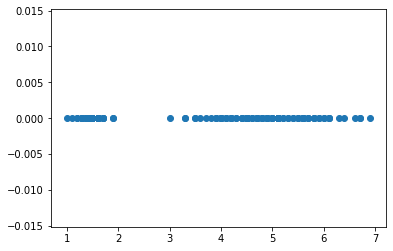

In [36]:
x = data[:, 2]
m = x.shape[0]
plt.scatter(x, np.zeros(m))
plt.show()

In [37]:
print("X shape", X.shape)scipy.stats.norm(0, 1).cdf(1.96)

0.9750021048517795

In [157]:
X = x.reshape(-1, 1)
m, n = X.shape
D = np.ones((k, n))
#W = np.random.random((m, k))
W = np.ones((m, k))

WT = W/W.sum(axis=0)
MU = WT.T.dot(X)
RES = X.dot(D.T)-MU.T
WT_RES = WT * RES
S2 = ((WT_RES**2).sum(axis=0)).reshape(-1, n)




In [161]:
RES**2

array([[5.560164e+00, 5.560164e+00],
       [5.560164e+00, 5.560164e+00],
       [6.041764e+00, 6.041764e+00],
       [5.098564e+00, 5.098564e+00],
       [5.560164e+00, 5.560164e+00],
       [4.235364e+00, 4.235364e+00],
       [5.560164e+00, 5.560164e+00],
       [5.098564e+00, 5.098564e+00],
       [5.560164e+00, 5.560164e+00],
       [5.098564e+00, 5.098564e+00],
       [5.098564e+00, 5.098564e+00],
       [4.656964e+00, 4.656964e+00],
       [5.560164e+00, 5.560164e+00],
       [7.064964e+00, 7.064964e+00],
       [6.543364e+00, 6.543364e+00],
       [5.098564e+00, 5.098564e+00],
       [6.041764e+00, 6.041764e+00],
       [5.560164e+00, 5.560164e+00],
       [4.235364e+00, 4.235364e+00],
       [5.098564e+00, 5.098564e+00],
       [4.235364e+00, 4.235364e+00],
       [5.098564e+00, 5.098564e+00],
       [7.606564e+00, 7.606564e+00],
       [4.235364e+00, 4.235364e+00],
       [3.452164e+00, 3.452164e+00],
       [4.656964e+00, 4.656964e+00],
       [4.656964e+00, 4.656964e+00],
 

In [158]:
print("k, m, n = ", k, m, n)
print("X shape (m, n)", X.shape)
print("MU shape (k, n)", mu.shape)
print("W shape (m, k)", W.shape)

k, m, n =  2 150 1
X shape (m, n) (150, 1)
MU shape (k, n) (2, 1)
W shape (m, k) (150, 2)


In [160]:
scipy.stats.norm(MU, S2).pdf(0)

array([[0.],
       [0.]])

In [147]:
((W_RES**2).sum(axis=0) / W.sum(axis=0)).reshape(-1, n)

array([[1.86740094],
       [1.9463804 ]])

In [ ]:
class gmm:
    def __init__(self, k):
        self.k = k
    def expection(self):
        scipy.stats.norm(0, 1).pdf(0)